In [ ]:
!pip install scikit-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip3 install pandas-datareader

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install --upgrade pandas
!pip install --upgrade pandas-datareader

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 109 kB 14.4 MB/s 
  Attempting uninstall: pandas-datareader
    Found existing installation: pandas-datareader 0.9.0
    Uninstalling pandas-datareader-0.9.0:
      Successfully uninstalled pandas-datareader-0.9.0


## **STOCK MARKET PREDICTION ON FB**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pandas_datareader as web
import datetime as dt

from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
%matplotlib inline
import pandas_datareader as web

from matplotlib.pylab import rcParams
rcParams['figure.figsize']=20,10
from keras.models import Sequential
from keras.layers import LSTM,Dropout,Dense


from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import statistics

In [ ]:
#Load Data
company = 'META'

start = dt.datetime(2012,1,1)
end = dt.datetime(2021,1,1)

data = web.DataReader(company, 'yahoo', start, end)

In [ ]:
#Prepare Data
scaler=MinMaxScaler(feature_range=(0,1))
scaled_data=scaler.fit_transform(data['Close'].values.reshape(-1,1))

prediction_days = 60

x_train=[]
y_train=[]

for x in range(prediction_days, len(scaled_data)):
    x_train.append(scaled_data[x-prediction_days:x, 0])
    y_train.append(scaled_data[x, 0])

x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [ ]:
#Build the Model
model = Sequential()

model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1)) 

#prediction of the next closing value

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, epochs=25, batch_size=32)

'''Test the model accuracy on existing data'''

Epoch 1/25
66/66 [==============================] - 9s 67ms/step - loss: 0.0147
Epoch 2/25
66/66 [==============================] - 5s 69ms/step - loss: 0.0031
Epoch 3/25
66/66 [==============================] - 7s 105ms/step - loss: 0.0029
Epoch 4/25
66/66 [==============================] - 8s 118ms/step - loss: 0.0026
Epoch 5/25
66/66 [==============================] - 8s 124ms/step - loss: 0.0024
Epoch 6/25
66/66 [==============================] - 5s 80ms/step - loss: 0.0021
Epoch 7/25
66/66 [==============================] - 4s 66ms/step - loss: 0.0021
Epoch 8/25
66/66 [==============================] - 4s 66ms/step - loss: 0.0019
Epoch 9/25
66/66 [==============================] - 4s 66ms/step - loss: 0.0019
Epoch 10/25
66/66 [==============================] - 4s 67ms/step - loss: 0.0022
Epoch 11/25
66/66 [==============================] - 5s 71ms/step - loss: 0.0018
Epoch 12/25
66/66 [==============================] - 5s 70ms/step - loss: 0.0017
Epoch 13/25
66/66 [===============

'Test the model accuracy on existing data'

In [ ]:
#Load Test Data
test_start=dt.datetime(2021, 2, 2)
test_end=dt.datetime.now()

test_data = web.DataReader(company, 'yahoo', test_start, test_end)
actual_prices=test_data['Close'].values

total_dataset=pd.concat((data['Close'], test_data['Close']), axis=0)

model_inputs=total_dataset[len(total_dataset)-len(test_data)-prediction_days:].values
model_inputs = model_inputs.reshape(-1, 1)
model_inputs = scaler.transform(model_inputs)

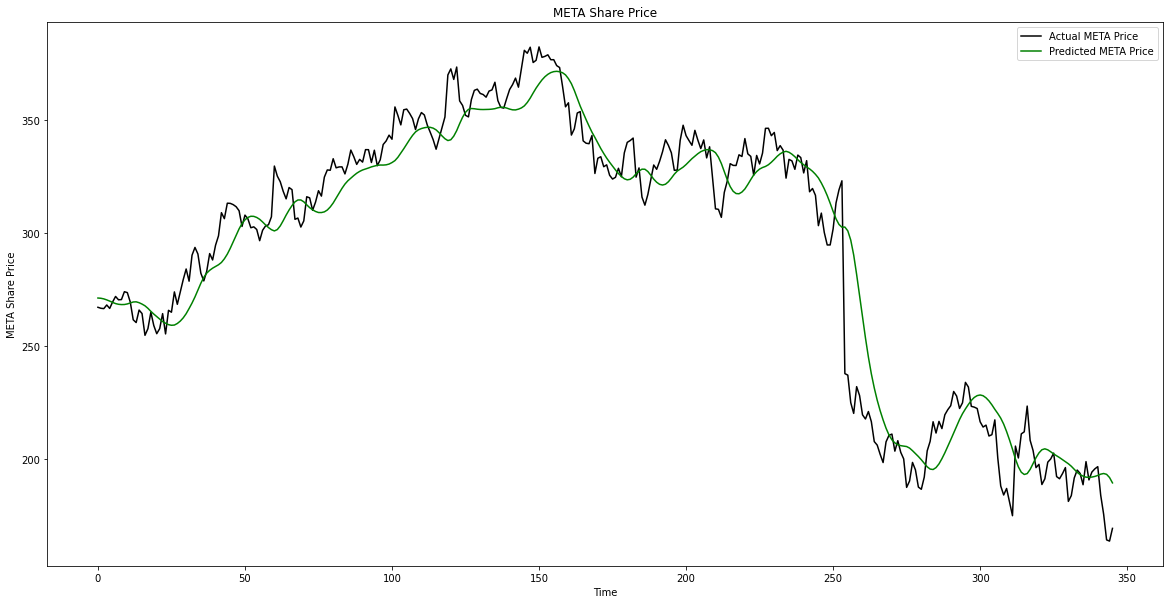

In [ ]:
# Make Predictions on Test Data
x_test=[]

for x in range(prediction_days, len(model_inputs)):
    x_test.append(model_inputs[x-prediction_days:x, 0])

x_test=np.array(x_test)
x_test=np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

predicted_prices=model.predict(x_test)
predicted_prices=scaler.inverse_transform(predicted_prices)

# Plot the test predictions
plt.plot(actual_prices, color = "black", label=f"Actual {company} Price")
plt.plot(predicted_prices, color="green", label=f"Predicted {company} Price")
plt.title(f"{company} Share Price")
plt.xlabel("Time")
plt.ylabel(f"{company} Share Price")
plt.legend()
plt.show()



In [ ]:
#Predict Next Day

real_data = [model_inputs[len(model_inputs)-prediction_days:len(model_inputs+1), 0]]
real_data = np.array(real_data)
real_data=np.reshape(real_data, (real_data.shape[0], real_data.shape[1],1))


prediction=model.predict(real_data)
prediction = scaler.inverse_transform(prediction)
print("The Predicted Stock Market Price on 16/06/2022")
print(f"Prediction: {prediction}")



The Predicted Stock Market Price on 16/06/2022
Prediction: [[186.52911]]


## **STOCK MARKET PREDICTIONS ON NESTLE INDIA**

In [ ]:
#Load Data
company = 'NESTLEIND.NS'

start = dt.datetime(2012,1,1)
end = dt.datetime(2021,1,1)

data = web.DataReader(company, 'yahoo', start, end)

In [ ]:
#Prepare Data
scaler=MinMaxScaler(feature_range=(0,1))
scaled_data=scaler.fit_transform(data['Close'].values.reshape(-1,1))

prediction_days = 60

x_train=[]
y_train=[]

for x in range(prediction_days, len(scaled_data)):
    x_train.append(scaled_data[x-prediction_days:x, 0])
    y_train.append(scaled_data[x, 0])

x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [ ]:
#Build the Model
model = Sequential()

model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1)) 

#prediction of the next closing value

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, epochs=25, batch_size=32)

Epoch 1/25
68/68 [==============================] - 10s 73ms/step - loss: 0.0133
Epoch 2/25
68/68 [==============================] - 5s 67ms/step - loss: 0.0022
Epoch 3/25
68/68 [==============================] - 4s 66ms/step - loss: 0.0019
Epoch 4/25
68/68 [==============================] - 5s 67ms/step - loss: 0.0020
Epoch 5/25
68/68 [==============================] - 7s 110ms/step - loss: 0.0018
Epoch 6/25
68/68 [==============================] - 8s 118ms/step - loss: 0.0016
Epoch 7/25
68/68 [==============================] - 8s 111ms/step - loss: 0.0020
Epoch 8/25
68/68 [==============================] - 4s 66ms/step - loss: 0.0016
Epoch 9/25
68/68 [==============================] - 5s 67ms/step - loss: 0.0018
Epoch 10/25
68/68 [==============================] - 4s 66ms/step - loss: 0.0019
Epoch 11/25
68/68 [==============================] - 5s 67ms/step - loss: 0.0017
Epoch 12/25
68/68 [==============================] - 4s 66ms/step - loss: 0.0014
Epoch 13/25
68/68 [==============

In [ ]:
#Load Test Data
test_start=dt.datetime(2021, 2, 2)
test_end=dt.datetime.now()

test_data = web.DataReader(company, 'yahoo', test_start, test_end)
actual_prices=test_data['Close'].values

total_dataset=pd.concat((data['Close'], test_data['Close']), axis=0)

model_inputs=total_dataset[len(total_dataset)-len(test_data)-prediction_days:].values
model_inputs = model_inputs.reshape(-1, 1)
model_inputs = scaler.transform(model_inputs)

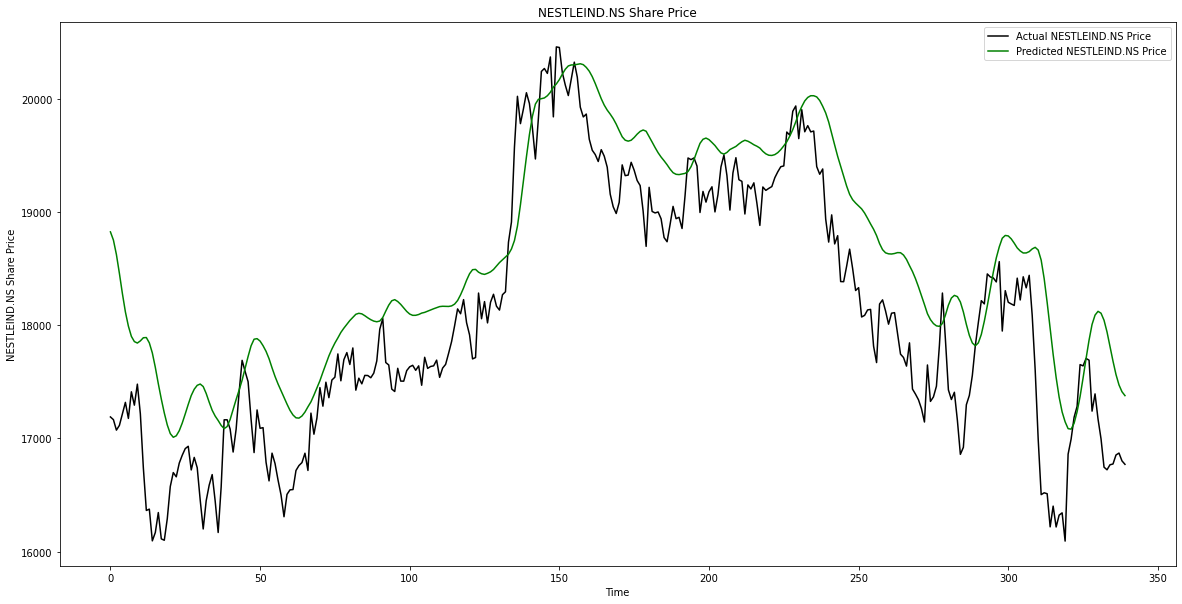

In [ ]:
# Make Predictions on Test Data
x_test=[]

for x in range(prediction_days, len(model_inputs)):
    x_test.append(model_inputs[x-prediction_days:x, 0])

x_test=np.array(x_test)
x_test=np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

predicted_prices=model.predict(x_test)
predicted_prices=scaler.inverse_transform(predicted_prices)

# Plot the test predictions
plt.plot(actual_prices, color = "black", label=f"Actual {company} Price")
plt.plot(predicted_prices, color="green", label=f"Predicted {company} Price")
plt.title(f"{company} Share Price")
plt.xlabel("Time")
plt.ylabel(f"{company} Share Price")
plt.legend()
plt.show()

In [ ]:
#Predict Next Day

real_data = [model_inputs[len(model_inputs)-prediction_days:len(model_inputs+1), 0]]
real_data = np.array(real_data)
real_data=np.reshape(real_data, (real_data.shape[0], real_data.shape[1],1))


prediction=model.predict(real_data)
prediction = scaler.inverse_transform(prediction)
print("The Predicted Stock Market Price on 16/06/2022")
print(f"Prediction: {prediction}")

The Predicted Stock Market Price on 16/06/2022
Prediction: [[17363.625]]


## **STOCK MARKET PREDICTIONS ON NETFLIX**

In [ ]:
#Load Data
company = 'NFLX'

start = dt.datetime(2012,1,1)
end = dt.datetime(2021,1,1)

data = web.DataReader(company, 'yahoo', start, end)

In [ ]:
#Prepare Data
scaler=MinMaxScaler(feature_range=(0,1))
scaled_data=scaler.fit_transform(data['Close'].values.reshape(-1,1))

prediction_days = 60

x_train=[]
y_train=[]

for x in range(prediction_days, len(scaled_data)):
    x_train.append(scaled_data[x-prediction_days:x, 0])
    y_train.append(scaled_data[x, 0])

x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [ ]:
#Build the Model
model = Sequential()

model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1)) 

#prediction of the next closing value

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, epochs=25, batch_size=32)

Epoch 1/25
69/69 [==============================] - 9s 66ms/step - loss: 0.0143
Epoch 2/25
69/69 [==============================] - 5s 72ms/step - loss: 0.0025
Epoch 3/25
69/69 [==============================] - 5s 66ms/step - loss: 0.0025
Epoch 4/25
69/69 [==============================] - 5s 66ms/step - loss: 0.0024
Epoch 5/25
69/69 [==============================] - 5s 67ms/step - loss: 0.0022
Epoch 6/25
69/69 [==============================] - 5s 67ms/step - loss: 0.0020
Epoch 7/25
69/69 [==============================] - 5s 67ms/step - loss: 0.0018
Epoch 8/25
69/69 [==============================] - 5s 67ms/step - loss: 0.0019
Epoch 9/25
69/69 [==============================] - 5s 66ms/step - loss: 0.0017
Epoch 10/25
69/69 [==============================] - 5s 67ms/step - loss: 0.0018
Epoch 11/25
69/69 [==============================] - 5s 66ms/step - loss: 0.0018
Epoch 12/25
69/69 [==============================] - 5s 66ms/step - loss: 0.0019
Epoch 13/25
69/69 [==================

In [ ]:
#Load Test Data
test_start=dt.datetime(2021, 2, 2)
test_end=dt.datetime.now()

test_data = web.DataReader(company, 'yahoo', test_start, test_end)
actual_prices=test_data['Close'].values

total_dataset=pd.concat((data['Close'], test_data['Close']), axis=0)

model_inputs=total_dataset[len(total_dataset)-len(test_data)-prediction_days:].values
model_inputs = model_inputs.reshape(-1, 1)
model_inputs = scaler.transform(model_inputs)

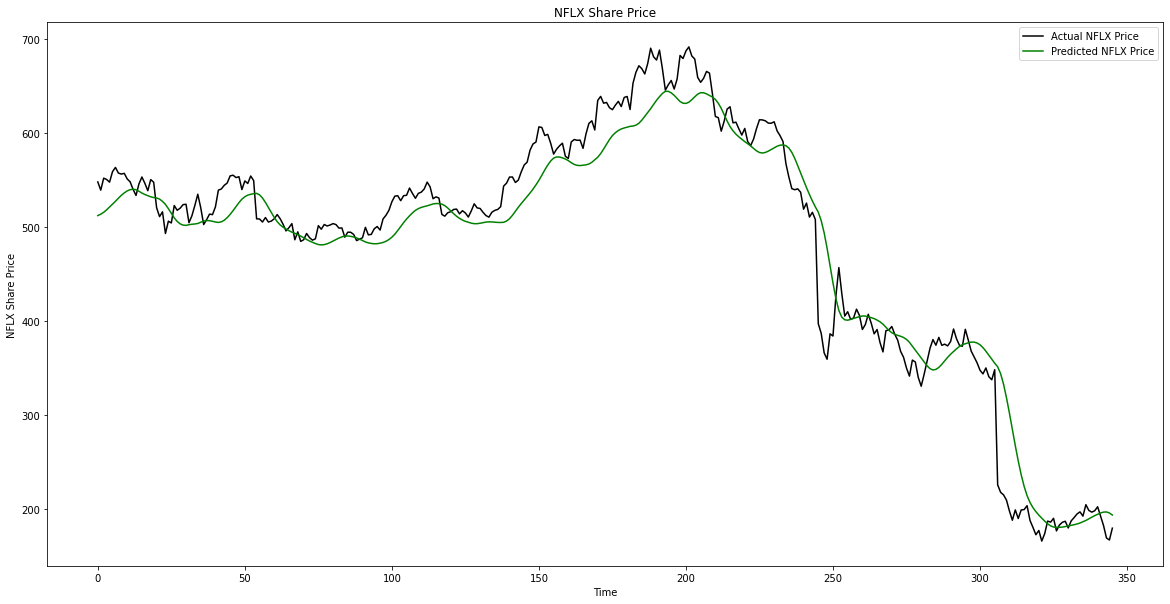

In [ ]:
# Make Predictions on Test Data
x_test=[]

for x in range(prediction_days, len(model_inputs)):
    x_test.append(model_inputs[x-prediction_days:x, 0])

x_test=np.array(x_test)
x_test=np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

predicted_prices=model.predict(x_test)
predicted_prices=scaler.inverse_transform(predicted_prices)

# Plot the test predictions
plt.plot(actual_prices, color = "black", label=f"Actual {company} Price")
plt.plot(predicted_prices, color="green", label=f"Predicted {company} Price")
plt.title(f"{company} Share Price")
plt.xlabel("Time")
plt.ylabel(f"{company} Share Price")
plt.legend()
plt.show()

In [ ]:
#Predict Next Day

real_data = [model_inputs[len(model_inputs)-prediction_days:len(model_inputs+1), 0]]
real_data = np.array(real_data)
real_data=np.reshape(real_data, (real_data.shape[0], real_data.shape[1],1))


prediction=model.predict(real_data)
prediction = scaler.inverse_transform(prediction)
print("The Predicted Stock Market Price on 16/06/2022")
print(f"Prediction: {prediction}")

The Predicted Stock Market Price on 16/06/2022
Prediction: [[191.333]]


# STOCK MARKET PREDICTIONS ON TATA CONSULTANCY SERVICES

In [ ]:
#Load Data
company = 'TCS.NS'

start = dt.datetime(2012,1,1)
end = dt.datetime(2021,1,1)

data = web.DataReader(company, 'yahoo', start, end)

In [ ]:
#Prepare Data
scaler=MinMaxScaler(feature_range=(0,1))
scaled_data=scaler.fit_transform(data['Close'].values.reshape(-1,1))

prediction_days = 60

x_train=[]
y_train=[]

for x in range(prediction_days, len(scaled_data)):
    x_train.append(scaled_data[x-prediction_days:x, 0])
    y_train.append(scaled_data[x, 0])

x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [ ]:
#Build the Model
model = Sequential()

model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1)) 

#prediction of the next closing value

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, epochs=25, batch_size=32)

Epoch 1/25
68/68 [==============================] - 9s 67ms/step - loss: 0.0146
Epoch 2/25
68/68 [==============================] - 5s 67ms/step - loss: 0.0028
Epoch 3/25
68/68 [==============================] - 5s 67ms/step - loss: 0.0027
Epoch 4/25
68/68 [==============================] - 5s 67ms/step - loss: 0.0021
Epoch 5/25
68/68 [==============================] - 5s 67ms/step - loss: 0.0022
Epoch 6/25
68/68 [==============================] - 5s 68ms/step - loss: 0.0020
Epoch 7/25
68/68 [==============================] - 5s 67ms/step - loss: 0.0022
Epoch 8/25
68/68 [==============================] - 5s 67ms/step - loss: 0.0021
Epoch 9/25
68/68 [==============================] - 5s 68ms/step - loss: 0.0019
Epoch 10/25
68/68 [==============================] - 5s 67ms/step - loss: 0.0019
Epoch 11/25
68/68 [==============================] - 5s 72ms/step - loss: 0.0018
Epoch 12/25
68/68 [==============================] - 5s 67ms/step - loss: 0.0017
Epoch 13/25
68/68 [==================

In [ ]:
#Load Test Data
test_start=dt.datetime(2021, 2, 2)
test_end=dt.datetime.now()

test_data = web.DataReader(company, 'yahoo', test_start, test_end)
actual_prices=test_data['Close'].values

total_dataset=pd.concat((data['Close'], test_data['Close']), axis=0)

model_inputs=total_dataset[len(total_dataset)-len(test_data)-prediction_days:].values
model_inputs = model_inputs.reshape(-1, 1)
model_inputs = scaler.transform(model_inputs)

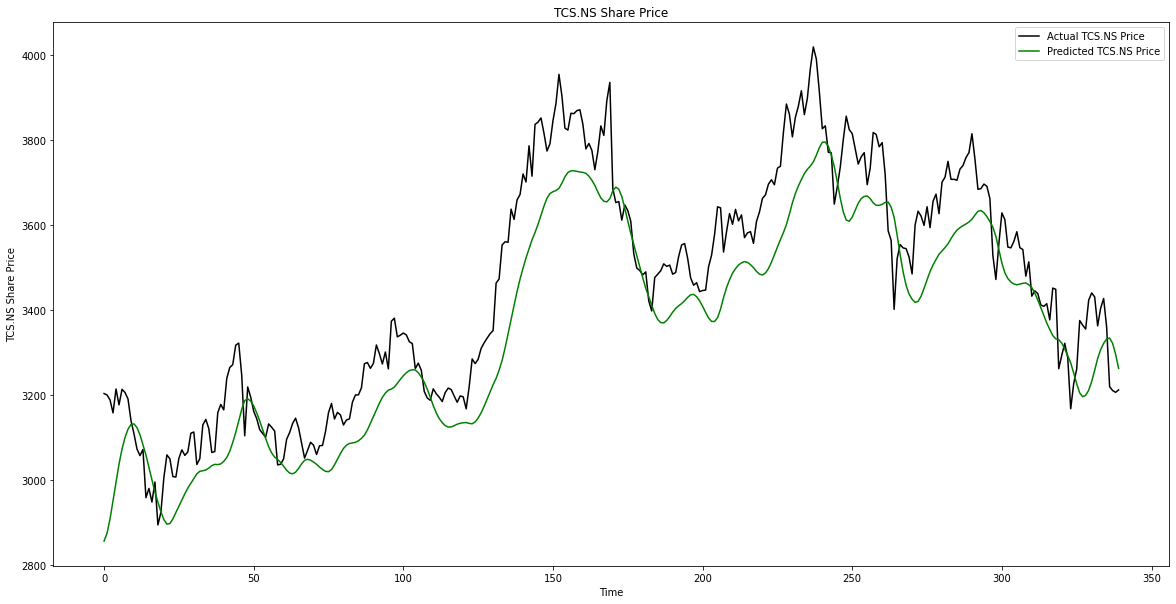

In [ ]:
# Make Predictions on Test Data
x_test=[]

for x in range(prediction_days, len(model_inputs)):
    x_test.append(model_inputs[x-prediction_days:x, 0])

x_test=np.array(x_test)
x_test=np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

predicted_prices=model.predict(x_test)
predicted_prices=scaler.inverse_transform(predicted_prices)

# Plot the test predictions
plt.plot(actual_prices, color = "black", label=f"Actual {company} Price")
plt.plot(predicted_prices, color="green", label=f"Predicted {company} Price")
plt.title(f"{company} Share Price")
plt.xlabel("Time")
plt.ylabel(f"{company} Share Price")
plt.legend()
plt.show()

In [ ]:
#Predict Next Day

real_data = [model_inputs[len(model_inputs)-prediction_days:len(model_inputs+1), 0]]
real_data = np.array(real_data)
real_data=np.reshape(real_data, (real_data.shape[0], real_data.shape[1],1))


prediction=model.predict(real_data)
prediction = scaler.inverse_transform(prediction)
print("The Predicted Stock Market Price on 16/06/2022")
print(f"Prediction: {prediction}")

The Predicted Stock Market Price on 16/06/2022
Prediction: [[3227.0928]]
